In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [3]:
def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))  # Random action
    else:
        return np.argmax(Q[state])  # Best action

In [4]:
# Initialize environment
env = gym.make("CliffWalking-v0")
n_states = env.observation_space.n
n_actions = env.action_space.n

# Hyperparameters
alpha = 0.1   # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1 # Exploration rate
n_episodes = 500

# Initialize Q-table
Q = np.zeros((n_states, n_actions))
cumulative_rewards = []

In [5]:
for episode in range(n_episodes):
    state = env.reset()[0]
    action = epsilon_greedy(Q, state, epsilon)
    total_reward = 0
    done = False

    while not done:
        next_state, reward, done, _, _ = env.step(action)
        next_action = epsilon_greedy(Q, next_state, epsilon)

        # SARSA update
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action
        total_reward += reward

    cumulative_rewards.append(total_reward)

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


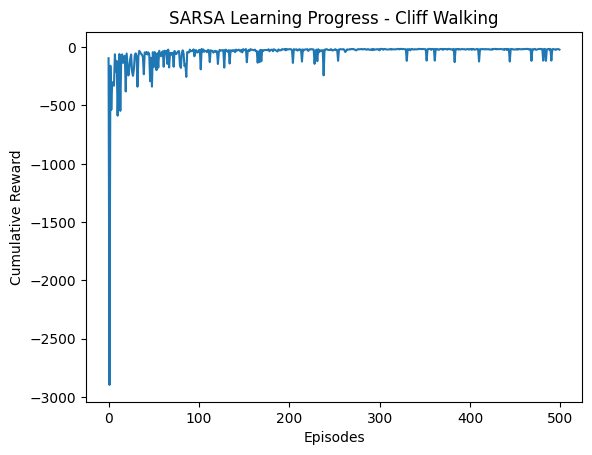

In [6]:
# Plot cumulative rewards per episode
plt.plot(cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("SARSA Learning Progress - Cliff Walking")
plt.show()

In [7]:
# Visualize learned policy
policy_arrows = ['←', '↓', '→', '↑']
policy = np.array([policy_arrows[np.argmax(Q[s])] for s in range(n_states)])
policy = policy.reshape((4, 12))
print("Learned Policy:")
print("\n".join([" ".join(row) for row in policy]))

Learned Policy:
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ →
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ →
← ↓ ↓ ↑ ← ← ↓ ← ↑ ↑ ↓ →
← ← ← ← ← ← ← ← ← ← ← ←
